# Project 1: Music Playlist

# Contents <a id='back'></a>

* [Introduction](#intro)
* [Stage 1. Data overview](#data_review)
    * [Conclusions](#data_review_conclusions)
* [Stage 2. Data preprocessing](#data_preprocessing)
    * [2.1 Header style](#header_style)
    * [2.2 Missing values](#missing_values)
    * [2.3 Duplicates](#duplicates)
    * [2.4 Conclusions](#data_preprocessing_conclusions)
* [Stage 3. Testing the hypotheses](#hypotheses)
    * [3.1 Hypothesis 1: user activity in the two cities](#activity)
    * [3.2 Hypothesis 2: music preferences on Monday and Friday](#week)
    * [3.3 Hypothesis 3: genre preferences in Springfield and Shelbyville](#genre)
* [Findings](#end)

## Introduction <a id='intro'></a>
Whenever we're doing research, we need to formulate hypotheses that we can then test. Sometimes we accept these hypotheses; other times, we reject them. To make the right decisions, a business must be able to understand whether or not it's making the right assumptions.

In this project, you'll compare the music preferences of the cities of Springfield and Shelbyville. You'll study real Y.Music data to test the hypotheses below and compare user behavior for these two cities.

### Goal: 
Test three hypotheses:
1. User activity differs depending on the day of the week and from city to city. 
2. On Monday mornings, Springfield and Shelbyville residents listen to different genres. This is also true for Friday evenings. 
3. Springfield and Shelbyville listeners have different preferences. In Springfield, they prefer pop, while Shelbyville has more rap fans.

### Stages 
Data on user behavior is stored in the file `/datasets/music_project_en.csv`. There is no information about the quality of the data, so you will need to explore it before testing the hypotheses. 

First, you'll evaluate the quality of the data and see whether its issues are significant. Then, during data preprocessing, you will try to account for the most critical problems.
 
Your project will consist of three stages:
 1. Data overview
 2. Data preprocessing
 3. Testing the hypotheses
 
[Back to Contents](#back)

## Stage 1. Data overview <a id='data_review'></a>

Open the data on Y.Music and explore it.

In [1]:
import pandas as pd # importing pandas


Read the file `music_project_en.csv` from the `/datasets/` folder and save it in the `df` variable:

In [2]:
df = pd.read_csv('music_project_en.csv') # reading the file and storing it to df
df.describe()

,userID,Track,artist,genre,City,time,Day
count,65079,63736,57512,63881,65079,65079,65079
unique,41748,39666,37806,268,2,20392,3
top,A8AE9169,Brand,Kartvelli,pop,Springfield,08:14:07,Friday
freq,76,136,136,8850,45360,14,23149


Print the first 10 table rows:

In [3]:
# obtaining the first 10 rows from the df table

display(df.head(10))

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Shelbyville,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Springfield,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Shelbyville,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Shelbyville,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Springfield,08:34:34,Monday
5,842029A1,Chains,Obladaet,rusrap,Shelbyville,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Springfield,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Springfield,20:47:49,Wednesday
8,8FA1D3BE,L’estate,Julia Dalia,ruspop,Springfield,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Shelbyville,21:20:49,Wednesday


Obtaining the general information about the table with one command:

In [4]:
# obtaining general information about the data in df

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63736 non-null  object
 2   artist    57512 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB
None


The table contains seven columns. They all store the same data type: `object`.

According to the documentation:
- `'userID'` — user identifier
- `'Track'` — track title
- `'artist'` — artist's name
- `'genre'`
- `'City'` — user's city
- `'time'` — the exact time the track was played
- `'Day'` — day of the week

We can see three issues with style in the column names:
1. Some names are uppercase, some are lowercase.
2. There are spaces in some names.
3. Some names are not clear and descriptive, e.g: Instead of 'time', should be 'time_track_played' `Detect the third issue yourself and describe it here`.

The number of column values is different. This means the data contains missing values.


### Conclusions <a id='data_review_conclusions'></a> 

Each row in the table stores data on a track that was played. Some columns describe the track itself: its title, artist and genre. The rest convey information about the user: the city they come from, the time they played the track. 

It's clear that the data is sufficient to test the hypotheses. However, there are missing values.

To move forward, we need to preprocess the data.

[Back to Contents](#back)

## Stage 2. Data preprocessing <a id='data_preprocessing'></a>
Correct the formatting in the column headers and deal with the missing values. Then, check whether there are duplicates in the data.

### Header style <a id='header_style'></a>
Print the column header:

In [5]:
# the list of column names in the df table

print(df.columns)

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')


Change column names according to the rules of good style:
* If the name has several words, use snake_case
* All characters must be lowercase
* Delete spaces

In [6]:
# renaming columns

df = df.rename(columns={
    '  userID':'user_id',
    'Track':'track',
    '  City  ' : 'city',
    'time':'time_tracked_played',
    'Day':'day'
})

Check the result. Print the names of the columns once more:

In [7]:
# checking result: the list of column names

print(df.columns)

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time_tracked_played',
       'day'],
      dtype='object')


[Back to Contents](#back)

### Missing values <a id='missing_values'></a>
First, find the number of missing values in the table. To do so, use two `pandas` methods:

In [8]:
# calculating missing values

print(df.isna().sum())

user_id                   0
track                  1343
artist                 7567
genre                  1198
city                      0
time_tracked_played       0
day                       0
dtype: int64


Not all missing values affect the research. For instance, the missing values in `track` and `artist` are not critical. You can simply replace them with clear markers.

But missing values in `'genre'` can affect the comparison of music preferences in Springfield and Shelbyville. In real life, it would be useful to learn the reasons why the data is missing and try to make up for them. But we do not have that opportunity in this project. So you will have to:
* Fill in these missing values with markers
* Evaluate how much the missing values may affect your computations

Replace the missing values in `'track'`, `'artist'`, and `'genre'` with the string `'unknown'`. To do this, create the `columns_to_replace` list, loop over it with `for`, and replace the missing values in each of the columns:

In [9]:
# looping over column names and replacing missing values with 'unknown'

columns_to_replace =['track','artist','genre']

for columns in columns_to_replace:
    df[columns]= df[columns].fillna('unknown')

Make sure the table contains no more missing values. Count the missing values again.

In [10]:
# counting missing values

print(df.isna().sum())

user_id                0
track                  0
artist                 0
genre                  0
city                   0
time_tracked_played    0
day                    0
dtype: int64


[Back to Contents](#back)

### Duplicates <a id='duplicates'></a>
Find the number of obvious duplicates in the table using one command:

In [11]:
# counting clear duplicates

print(df.duplicated().sum())

3826


Call the `pandas` method for getting rid of obvious duplicates:

In [12]:
# removing obvious duplicates

df = df.drop_duplicates().reset_index(drop=True)

Count obvious duplicates once more to make sure you have removed all of them:

In [13]:
# checking for duplicates

print(df.duplicated().sum())

0


Now get rid of implicit duplicates in the `genre` column. For example, the name of a genre can be written in different ways. Such errors will also affect the result.

Print a list of unique genre names, sorted in alphabetical order. To do so:
* Retrieve the intended DataFrame column 
* Apply a sorting method to it
* For the sorted column, call the method that will return all unique column values

In [14]:
# viewing unique genre names

df['genre'].sort_values().unique()


array(['acid', 'acoustic', 'action', 'adult', 'africa', 'afrikaans',
       'alternative', 'ambient', 'americana', 'animated', 'anime',
       'arabesk', 'arabic', 'arena', 'argentinetango', 'art', 'audiobook',
       'avantgarde', 'axé', 'baile', 'balkan', 'beats', 'bigroom',
       'black', 'bluegrass', 'blues', 'bollywood', 'bossa', 'brazilian',
       'breakbeat', 'breaks', 'broadway', 'cantautori', 'cantopop',
       'canzone', 'caribbean', 'caucasian', 'celtic', 'chamber',
       'children', 'chill', 'chinese', 'choral', 'christian', 'christmas',
       'classical', 'classicmetal', 'club', 'colombian', 'comedy',
       'conjazz', 'contemporary', 'country', 'cuban', 'dance',
       'dancehall', 'dancepop', 'dark', 'death', 'deep', 'deutschrock',
       'deutschspr', 'dirty', 'disco', 'dnb', 'documentary', 'downbeat',
       'downtempo', 'drum', 'dub', 'dubstep', 'eastern', 'easy',
       'electronic', 'electropop', 'emo', 'entehno', 'epicmetal',
       'estrada', 'ethnic', 'eurofo

Findings:

`hip`,`hip-hop` and `hiphop` are duplicates.

In [15]:
# function for replacing implicit duplicates

def replace_wrong_genres(wrong_genres, correct_genre):
   for wrong_genre in wrong_genres:
    df['genre'] = df['genre'].replace(wrong_genre, correct_genre)

Call `replace_wrong_genres()` and pass it arguments so that it clears implicit duplcates (`hip`, `hop`, and `hip-hop`) and replaces them with `hiphop`:

In [16]:
# removing implicit duplicates

replace_wrong_genres(['hip', 'hop', 'hip-hop'], 'hiphop')

Make sure the duplicate names were removed. Print the list of unique values from the `'genre'` column:

In [17]:
# checking for implicit duplicates

print(df['genre'].sort_values().unique())

['acid' 'acoustic' 'action' 'adult' 'africa' 'afrikaans' 'alternative'
 'ambient' 'americana' 'animated' 'anime' 'arabesk' 'arabic' 'arena'
 'argentinetango' 'art' 'audiobook' 'avantgarde' 'axé' 'baile' 'balkan'
 'beats' 'bigroom' 'black' 'bluegrass' 'blues' 'bollywood' 'bossa'
 'brazilian' 'breakbeat' 'breaks' 'broadway' 'cantautori' 'cantopop'
 'canzone' 'caribbean' 'caucasian' 'celtic' 'chamber' 'children' 'chill'
 'chinese' 'choral' 'christian' 'christmas' 'classical' 'classicmetal'
 'club' 'colombian' 'comedy' 'conjazz' 'contemporary' 'country' 'cuban'
 'dance' 'dancehall' 'dancepop' 'dark' 'death' 'deep' 'deutschrock'
 'deutschspr' 'dirty' 'disco' 'dnb' 'documentary' 'downbeat' 'downtempo'
 'drum' 'dub' 'dubstep' 'eastern' 'easy' 'electronic' 'electropop' 'emo'
 'entehno' 'epicmetal' 'estrada' 'ethnic' 'eurofolk' 'european'
 'experimental' 'extrememetal' 'fado' 'film' 'fitness' 'flamenco' 'folk'
 'folklore' 'folkmetal' 'folkrock' 'folktronica' 'forró' 'frankreich'
 'französisch' 


Solved duplicate issue of `hiphop`-
Compared to the original data when you did not fix this instance

Before:   

    
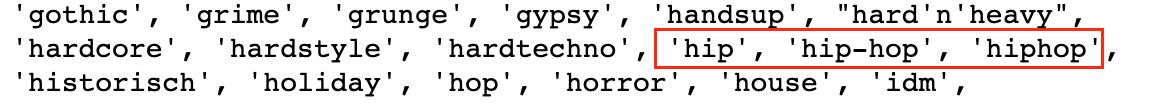


After:

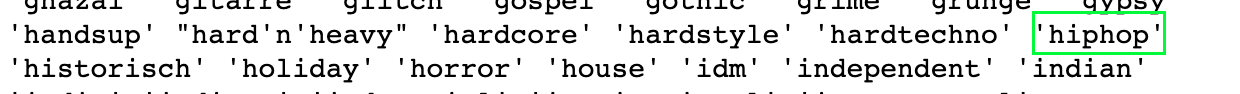
    


[Back to Contents](#back)

### Conclusions <a id='data_preprocessing_conclusions'></a>
We detected three issues with the data:

- Incorrect header styles
- Missing values
- Obvious and implicit duplicates

The headers have been cleaned up to make processing the table simpler.

All missing values have been replaced with `'unknown'`. But we still have to see whether the missing values in `'genre'` will affect our calculations.

The absence of duplicates will make the results more precise and easier to understand.

Now we can move on to testing hypotheses. 

[Back to Contents](#back)

## Stage 3. Testing hypotheses <a id='hypotheses'></a>

### Hypothesis 1: comparing user behavior in two cities <a id='activity'></a>

According to the first hypothesis, users from Springfield and Shelbyville listen to music differently. Test this using the data on three days of the week: Monday, Wednesday, and Friday.

* Divide the users into groups by city.
* Compare how many tracks each group played on Monday, Wednesday, and Friday.


For the sake of practice, perform each computation separately. 

Evaluate user activity in each city. Group the data by city and find the number of songs played in each group.



In [18]:
# Counting up the tracks played in each city

print(df.groupby('city')['user_id'].count()) 

city
Shelbyville    18512
Springfield    42741
Name: user_id, dtype: int64


Springfield has more tracks played than Shelbyville. But that does not imply that citizens of Springfield listen to music more often. This city is simply bigger, and there are more users.

Now group the data by day of the week and find the number of tracks played on Monday, Wednesday, and Friday.


In [19]:
# Calculating tracks played on each of the three days

print(df.groupby('day')['track'].count())

day
Friday       21840
Monday       21354
Wednesday    18059
Name: track, dtype: int64


Wednesday is the quietest day overall. But if we consider the two cities separately, we might come to a different conclusion.

Create the `number_tracks()` function to calculate the number of songs played for a given day and city. It will require two parameters:
* day of the week
* name of the city

In the function, use a variable to store the rows from the original table, where:
  * `'day'` column value is equal to the `day` parameter
  * `'city'` column value is equal to the `city` parameter

Apply consecutive filtering with logical indexing.

Then calculate the `'user_id'` column values in the resulting table. Store the result to a new variable. Return this variable from the function.

In [20]:
# <creating the function number_tracks()>
# We'll declare a function with two parameters: day=, city=.
# Let the track_list variable store the df rows where
# the value in the 'day' column is equal to the day= parameter and, at the same time, 
# the value in the 'city' column is equal to the city= parameter (apply consecutive filtering with logical indexing).
# Let the track_list_count variable store the number of 'user_id' column values in track_list
# (found with the count() method).
# Let the function return a number: the value of track_list_count.

def number_tracks(day , city):
    track_list = df[(df['day'] == day) & (df['city']== city)]
    track_list_count = track_list['user_id'].count()
    return track_list_count

# The function counts tracked played for a certain city and day.
# It first retrieves the rows with the intended day from the table,
# then filters out the rows with the intended city from the result,
# then finds the number of 'user_id' values in the filtered table,
# then returns that number.
# To see what it returns, wrap the function call in print().

print(number_tracks('Monday', 'Springfield'))

15740


Call `number_tracks()` six times, changing the parameter values, so that you retrieve the data on both cities for each of the three days.

In [21]:
# the number of songs played in Springfield on Monday

print(number_tracks('Monday', 'Springfield'))

15740


In [22]:
# the number of songs played in Shelbyville on Monday

print(number_tracks('Monday', 'Shelbyville'))

5614


In [23]:
# the number of songs played in Springfield on Wednesday

print(number_tracks('Wednesday', 'Springfield'))

11056


In [24]:
# the number of songs played in Shelbyville on Wednesday

print(number_tracks('Wednesday', 'Shelbyville'))

7003


In [25]:
# the number of songs played in Springfield on Friday

print(number_tracks('Friday', 'Springfield'))

15945


In [26]:
# the number of songs played in Shelbyville on Friday

print(number_tracks('Friday', 'Shelbyville'))

5895


Use `pd.DataFrame` to create a table, where
* Column names are: `['city', 'monday', 'wednesday', 'friday']`
* The data is the results you got from `number_tracks()`

In [27]:
# table with results

import pandas as pd

monday_springfield_count = number_tracks('Monday', 'Springfield')
monday_shelbyville_count = number_tracks('Monday', 'Shelbyville')
wednesday_springfield_count = number_tracks('Wednesday', 'Springfield')
wednesday_shelbyville_count = number_tracks('Wednesday', 'Shelbyville')
friday_springfield_count = number_tracks('Friday', 'Springfield')
friday_shelbyville_count = number_tracks('Friday', 'Shelbyville')

# Create DataFrame table
data = {'city': ['Springfield', 'Shelbyville'],
        'monday': [monday_springfield_count, monday_shelbyville_count],
        'wednesday': [wednesday_springfield_count, wednesday_shelbyville_count],
        'friday': [friday_springfield_count, friday_shelbyville_count]}

df_table = pd.DataFrame(data)

df_table

,city,monday,wednesday,friday
0,Springfield,15740,11056,15945
1,Shelbyville,5614,7003,5895


**Conclusions**

The data reveals differences in user behavior:

- In Springfield, the number of songs played peaks on Mondays and Fridays, while on Wednesday there is a decrease in activity.
- In Shelbyville, on the contrary, users listen to music more on Wednesday. User activity on Monday and Friday is smaller.

So the first hypothesis seems to be correct.

[Back to Contents](#back)

### Hypothesis 2: music at the beginning and end of the week <a id='week'></a>

According to the second hypothesis, on Monday morning and Friday night, citizens of Springfield listen to genres that differ from ones users from Shelbyville enjoy.

Get tables (make sure that the name of your combined table matches the DataFrame given in the two code blocks below):
* For Springfield — `spr_general`
* For Shelbyville — `shel_general`

In [28]:
# create the spr_general table from the df rows, 
# where the value in the 'city' column is 'Springfield'

spr_general = df[df['city'] == 'Springfield']

In [29]:
# create the shel_general from the df rows,
# where the value in the 'city' column is 'Shelbyville'

shel_general = df[df['city'] == 'Shelbyville']

Write the `genre_weekday()` function with four parameters:
* A table for data (`df`)
* The day of the week (`day`)
* The first timestamp, in 'hh:mm' format (`time1`)
* The last timestamp, in 'hh:mm' format (`time2`)

The function should return info on the 15 most popular genres on a given day within the period between the two timestamps.

In [30]:
# 1) Let the genre_df variable store the rows that meet several conditions:
#    - the value in the 'day' column is equal to the value of the day= argument
#    - the value in the 'time' column is greater than the value of the time1= argument
#    - the value in the 'time' column is smaller than the value of the time2= argument
#    Use consecutive filtering with logical indexing.

# 2) Group genre_df by the 'genre' column, take one of its columns, 
#    and use the count() method to find the number of entries for each of 
#    the represented genres; store the resulting Series to the
#    genre_df_count variable

# 3) Sort genre_df_count in descending order of frequency and store the result
#    to the genre_df_sorted variable

# 4) Return a Series object with the first 15 genre_df_sorted value - the 15 most
#    popular genres (on a given day, within a certain timeframe)

# Write your function here

def genre_weekday(df, day, time1, time2):
    # consecutive filtering
    # Create the variable genre_df which will store only those df rows where the day is equal to day=
    genre_df = df[df['day'] == day] # write your code here

    # filter again so that genre_df will store only those rows where the time is smaller than time2=
    genre_df = df[df['time_tracked_played'] < time2] # write your code here

    # filter once more so that genre_df will store only rows where the time is greater than time1=
    genre_df = df[df['time_tracked_played'] > time1] # write your code here

    # group the filtered DataFrame by the column with the names of genres, take the genre column, and find the number of rows for each genre with the count() method
    genre_df_count = genre_df.groupby('genre')['genre'].count() # write your code here

    # sort the result in descending order (so that the most popular genres come first in the Series object)
    genre_df_sorted = genre_df_count.sort_values(ascending = False) # write your code here

    # we will return the Series object storing the 15 most popular genres on a given day in a given timeframe
    return genre_df_sorted[:15]

Compare the results of the `genre_weekday()` function for Springfield and Shelbyville on Monday morning (from 7AM to 11AM) and on Friday evening (from 17:00 to 23:00):

In [31]:
# calling the function for Monday morning in Springfield (use spr_general instead of the df table)

genre_weekday(spr_general, 'Monday', '07:00' ,'11:00')

genre
pop            5892
dance          4435
rock           3965
electronic     3786
hiphop         2096
classical      1616
world          1432
alternative    1379
ruspop         1372
rusrap         1161
jazz            980
unknown         849
metal           832
soundtrack      785
folk            692
Name: genre, dtype: int64

In [32]:
# calling the function for Monday morning in Shelbyville (use shel_general instead of the df table)

genre_weekday(shel_general, 'Monday','07:00', '11:00')

genre
pop            2431
dance          1932
rock           1879
electronic     1736
hiphop          960
alternative     649
classical       646
rusrap          564
ruspop          538
world           515
jazz            486
metal           378
soundtrack      331
rnb             321
rap             309
Name: genre, dtype: int64

In [33]:
# calling the function for Friday evening in Springfield

genre_weekday(spr_general, 'Friday', '17:00' ,'23:00')

genre
pop            1983
dance          1430
rock           1386
electronic     1284
hiphop          685
world           501
classical       487
alternative     475
ruspop          435
rusrap          382
jazz            332
soundtrack      284
unknown         255
folk            237
metal           233
Name: genre, dtype: int64

In [34]:
# calling the function for Friday evening in Shelbyville

genre_weekday(shel_general, 'Friday','17:00', '23:00')

genre
pop            839
rock           667
electronic     649
dance          626
hiphop         332
alternative    234
classical      219
rusrap         184
jazz           179
world          179
ruspop         170
metal          135
soundtrack     123
unknown        120
folk           104
Name: genre, dtype: int64

**Conclusion**

Having compared the top 15 genres on Monday morning, we can draw the following conclusions:

1. Users from Springfield and Shelbyville listen to similar music. The top five genres are the same, only rock and electronic have switched places.

2. In Springfield, the number of missing values turned out to be so big that the value `'unknown'` came in 10th. This means that missing values make up a considerable portion of the data, which may be a basis for questioning the reliability of our conclusions.

For Friday evening, the situation is similar. Individual genres vary somewhat, but on the whole, the top 15 is similar for the two cities.

Thus, the second hypothesis has been partially proven true:
* Users listen to similar music at the beginning and end of the week.
* There is no major difference between Springfield and Shelbyville. In both cities, pop is the most popular genre.

However, the number of missing values makes this result questionable. In Springfield, there are so many that they affect our top 15. Were we not missing these values, things might look different.

[Back to Contents](#back)

In [35]:
display(df)

,user_id,track,artist,genre,city,time_tracked_played,day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Shelbyville,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Springfield,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Shelbyville,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Shelbyville,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Springfield,08:34:34,Monday
...,...,...,...,...,...,...,...
61248,729CBB09,My Name,McLean,rnb,Springfield,13:32:28,Wednesday
61249,D08D4A55,Maybe One Day (feat. Black Spade),Blu & Exile,hiphop,Shelbyville,10:00:00,Monday
61250,C5E3A0D5,Jalopiina,unknown,industrial,Springfield,20:09:26,Friday
61251,321D0506,Freight Train,Chas McDevitt,rock,Springfield,21:43:59,Friday


### Hypothesis 3: genre preferences in Springfield and Shelbyville <a id='genre'></a>

Hypothesis: Shelbyville loves rap music. Springfield's citizens are more into pop.

Group the `spr_general` table by genre and find the number of songs played for each genre with the `count()` method. Then sort the result in descending order and store it to `spr_genres`.

In [36]:
# on one line: group the spr_general table by the 'genre' column, 
# count the 'genre' values with count() in the grouping, 
# sort the resulting Series in descending order, and store it to spr_genres

spr_genres = spr_general.groupby('genre')['genre'].count().sort_values(ascending=False)

Print the first 10 rows from `spr_genres`:

In [37]:
# printing the first 10 rows of spr_genres

print(spr_genres.head(10))

genre
pop            5892
dance          4435
rock           3965
electronic     3786
hiphop         2096
classical      1616
world          1432
alternative    1379
ruspop         1372
rusrap         1161
Name: genre, dtype: int64


Now do the same with the data on Shelbyville.

Group the `shel_general` table by genre and find the number of songs played for each genre. Then sort the result in descending order and store it to the `shel_genres` table:


In [38]:
# on one line: group the shel_general table by the 'genre' column, 
# count the 'genre' values in the grouping with count(), 
# sort the resulting Series in descending order and store it to shel_genres

shel_genres = shel_general.groupby('genre')['genre'].count().sort_values(ascending=False)

Print the first 10 rows of `shel_genres`:

In [39]:
# printing the first 10 rows from shel_genres

print(shel_genres.head(10))

genre
pop            2431
dance          1932
rock           1879
electronic     1736
hiphop          960
alternative     649
classical       646
rusrap          564
ruspop          538
world           515
Name: genre, dtype: int64


**Conclusion**

The hypothesis has been partially proven true:
* Pop music is the most popular genre in Springfield, as expected.
* However, pop music turned out to be equally popular in Springfield and Shelbyville, and rap wasn't in the top 5 for either city.


[Back to Contents](#back)

# Findings <a id='end'></a>

We have tested the following three hypotheses:

1. User activity differs depending on the day of the week and from city to city. 
2. On Monday mornings, Springfield and Shelbyville residents listen to different genres. This is also true for Friday evenings. 
3. Springfield and Shelbyville listeners have different preferences. In both Springfield and Shelbyville, they prefer pop.

After analyzing the data, we concluded:

1. User activity in Springfield and Shelbyville depends on the day of the week, though the cities vary in different ways. 

The first hypothesis is fully accepted.

2. Musical preferences do not vary significantly over the course of the week in both Springfield and Shelbyville. We can see small differences in order on Mondays, but:
* In Springfield and Shelbyville, people listen to pop music most.

So we can't accept this hypothesis. We must also keep in mind that the result could have been different if not for the missing values.

3. It turns out that the musical preferences of users from Springfield and Shelbyville are quite similar.

The third hypothesis is rejected. If there is any difference in preferences, it cannot be seen from this data.

### Note 
In real projects, research involves statistical hypothesis testing, which is more precise and more quantitative. Also note that you cannot always draw conclusions about an entire city based on the data from just one source.

You will study hypothesis testing in the sprint on statistical data analysis.

[Back to Contents](#back)